In [1]:
import warnings
import pandas as pd
from PIL import Image
from transformers import pipeline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from utils.image_utils import scale_image


# Suppress this specific warning
warnings.filterwarnings('ignore', message='.*copying from a non-meta parameter.*')


#### Basic object detection in static images

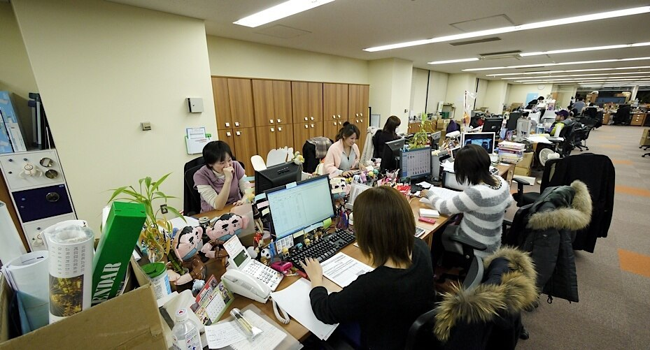

In [2]:
# Open an image and display it
image = Image.open('./data/image-001.jpg')
display(scale_image(image, 0.7))


In [3]:
obj_detector = pipeline(
  'object-detection',
  model='facebook/detr-resnet-50'
)

results = obj_detector(image)

print(obj_detector.model.config.id2label)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


{0: 'N/A', 1: 'person', 10: 'traffic light', 11: 'fire hydrant', 12: 'street sign', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 2: 'bicycle', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 26: 'hat', 27: 'backpack', 28: 'umbrella', 29: 'shoe', 3: 'car', 30: 'eye glasses', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 4: 'motorcycle', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 45: 'plate', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 5: 'airplane', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 6: 'bus', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 66: 'mirror', 67: 'dining table', 68: 'window', 69: 'desk', 7: 'train', 70: 'toi

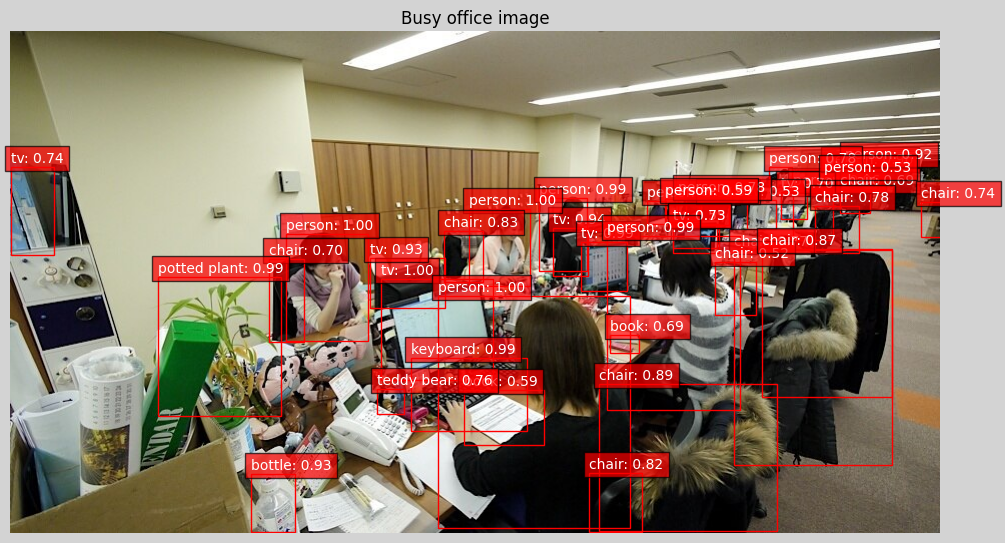

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('lightgray')

ax.imshow(image)
ax.set_title('Busy office image')
ax.axis('off')

for obj in results:
  box = obj['box']
  label = obj['label']
  score = obj['score']
  
  # draw the rectangle
  rect_x = box['xmin']
  rect_y = box['ymin']
  rect_w = box['xmax'] - box['xmin']
  rect_h = box['ymax'] - box['ymin']
  rect = patches.Rectangle(
    (rect_x, rect_y), rect_w, rect_h,
    linewidth=1,
    edgecolor='red',
    facecolor='none'
  )
  
  ax.add_patch(rect)
  
  # add labels
  ax.text(
    rect_x, rect_y - 5,
    f'{label}: {score:.2f}',
    color='white',
    fontsize=10,
    bbox={'facecolor': 'red', 'alpha': 0.7}
  )
  
plt.show()

#### Object detection in live camera feed